# Table of Contents
 <p><div class="lev1 toc-item"><a href="#逻辑回归处理二元分类" data-toc-modified-id="逻辑回归处理二元分类-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>逻辑回归处理二元分类</a></div><div class="lev2 toc-item"><a href="#垃圾邮件分类" data-toc-modified-id="垃圾邮件分类-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>垃圾邮件分类</a></div><div class="lev3 toc-item"><a href="#Read-Data" data-toc-modified-id="Read-Data-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Read Data</a></div><div class="lev3 toc-item"><a href="#计算TF-IDF权重" data-toc-modified-id="计算TF-IDF权重-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>计算TF-IDF权重</a></div><div class="lev3 toc-item"><a href="#建模" data-toc-modified-id="建模-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>建模</a></div><div class="lev3 toc-item"><a href="#模型效果评估" data-toc-modified-id="模型效果评估-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>模型效果评估</a></div><div class="lev4 toc-item"><a href="#准确率" data-toc-modified-id="准确率-1.1.4.1"><span class="toc-item-num">1.1.4.1&nbsp;&nbsp;</span>准确率</a></div><div class="lev4 toc-item"><a href="#精确率和召回率" data-toc-modified-id="精确率和召回率-1.1.4.2"><span class="toc-item-num">1.1.4.2&nbsp;&nbsp;</span>精确率和召回率</a></div><div class="lev4 toc-item"><a href="#综合评价指标" data-toc-modified-id="综合评价指标-1.1.4.3"><span class="toc-item-num">1.1.4.3&nbsp;&nbsp;</span>综合评价指标</a></div><div class="lev4 toc-item"><a href="#ROC-AUC" data-toc-modified-id="ROC-AUC-1.1.4.4"><span class="toc-item-num">1.1.4.4&nbsp;&nbsp;</span>ROC AUC</a></div><div class="lev2 toc-item"><a href="#glass-identification-dataset" data-toc-modified-id="glass-identification-dataset-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>glass identification dataset</a></div><div class="lev3 toc-item"><a href="#build-model" data-toc-modified-id="build-model-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>build model</a></div><div class="lev3 toc-item"><a href="#Interpreting-Coefficients" data-toc-modified-id="Interpreting-Coefficients-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Interpreting Coefficients</a></div><div class="lev2 toc-item"><a href="#Logistic-Regression-with-Categorical-Features" data-toc-modified-id="Logistic-Regression-with-Categorical-Features-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Logistic Regression with Categorical Features</a></div><div class="lev2 toc-item"><a href="#admission-into-graduate-school" data-toc-modified-id="admission-into-graduate-school-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>admission into graduate school</a></div><div class="lev3 toc-item"><a href="#dummy-variables" data-toc-modified-id="dummy-variables-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>dummy variables</a></div><div class="lev3 toc-item"><a href="#Performing-the-regression" data-toc-modified-id="Performing-the-regression-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Performing the regression</a></div><div class="lev3 toc-item"><a href="#Prediction" data-toc-modified-id="Prediction-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Prediction</a></div><div class="lev3 toc-item"><a href="#Takeaways" data-toc-modified-id="Takeaways-1.4.4"><span class="toc-item-num">1.4.4&nbsp;&nbsp;</span>Takeaways</a></div><div class="lev1 toc-item"><a href="#3-class-Classifier" data-toc-modified-id="3-class-Classifier-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>3-class Classifier</a></div>

In [1]:
#encoding=utf8

import numpy as np
import pandas as pd
import zipfile

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model.logistic import LogisticRegression
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix,  classification_report
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_score, recall_score
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn import datasets

import statsmodels.api as sm

%matplotlib inline

逻辑回归是用来做分类任务的。分类任务的目标是找一个函数，把观测值匹配到相关的类和标签上。学习算法必须用成对的特征向量和对应的标签来估计匹配函数的参数，从而实现更好的分类效果。在二元分类（binary classification）中，分类算法必须把一个实例配置两个类别。二元分类案例包括，预测患者是否患有某种疾病，音频中是否含有人声等。多元分类中，分类算法需要为每个实例都分类一组标签。

# 逻辑回归处理二元分类

普通的线性回归假设响应变量呈正态分布，也称为高斯分布（Gaussian distribution ）或钟形曲线（bell curve）。正态分布数据是对称的，且均值，中位数和众数（mode）是一样的。很多自然现象都服从正态分布。比如，人类的身高就服从正态分布。      

在某些问题里，响应变量不是正态分布的。比如，掷一个硬币获取正反两面的概率分布是伯努力分布（Bernoulli distribution），又称两点分布或者0-1分布。表示一个事件发生的概率是p，不发生的概率是1-p，概率在{0,1}之间。线性回归假设解释变量值的变化会引起响应变量值的变化，如果响应变量的值是概率的，这条假设就不满足了。广义线性回归去掉了这条假设，用一个**联连函数(link function)**来描述解释变量与响应变量的关系。   

实际上，在线性回归里面，我们已经用了联连函数。普通线性回归作为广义线性回归的特例使用的是恒等联连函数(identity link function)，将解释变量的通过线性组合的方式来联接服从正态分布的响应变量。如果响应变量不服从正态分布，就要用另外一种联连函数了。   

在逻辑回归里，响应变量描述了类似于掷一个硬币结果为正面的概率。如果响应变量等于或超过了指定的临界值，预测结果就是正面，否则预测结果就是反面。响应变量是一个像线性回归中的解释变量构成的函数表示，称为逻辑函数（logistic function）。一个值在{0,1}之间的逻辑函数如下所示:

$$F(t) = \frac{1}{1 + e^{-t}}$$   

对数函数（logit function）是逻辑函数的逆运算：  

$$g(x) = log\frac{F(x)}{1-F(x)} = \beta_{0} + \beta_{1}x$$

**Logistic regression**: log-odds of a categorical response being "true" (1) is modeled as a linear combination of the features:
$$log(\frac{p}{1-p}) = \beta_{0} + \beta_{1} x$$

This is called the **logit function**.   

Let t = $\beta_{0} + \beta_{1} x$, then

$$p = \frac{1}{1+e^{-t}}$$

Probability is sometimes written as $\pi$:   
$$log(\frac{\pi}{1 - \pi}) = \beta_{0} + \beta_{1} x$$

The equation can be rearranged into the **logistic function**:   
$$\pi = \frac{e^{\beta_{0} + \beta_{1} x}}{1 + e^{\beta_{0} + \beta_{1} x}}$$

In other words:   

- Logistic regression outputs the probabilities of a specific class     
- Those probabilities can be converted into class predictions     

The logistic function has some nice properties:      

- Takes on an "s" shape
- Output is bounded by 0 and 1

Notes:  

- **Multinomial logistic regression** is used when there are more than 2 classes.    
- Coefficients are estimated using **maximum likelihood** estimation, meaning that we choose parameters that maximize the likelihood of the observed data.

$$probability = \frac{one\ outcome}{all\ outcomes}$$
$$odds = \frac{one\ outcome}{all\ other\ outcomes}$$
$$odds = \frac{probability}{1 - probability}$$
$$probability = \frac{odds}{1 + odds}$$

## 垃圾邮件分类

### Read Data

加载数据，并分成训练集（75%）和测试集（25%）

In [2]:
df = pd.read_csv("SMSSpamCollection.txt", delimiter="\t", header=None)
df.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.shape

(5572, 2)

In [4]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df[1], df[0])

### 计算TF-IDF权重

In [5]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)

### 建模

In [6]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

### 模型效果评估

二元分类的效果评估方法有很多，常见的包括准确率（accuracy），精确率（precision）和召回率（recall）三项指标，以及综合评价指标（F1 measure）， ROC AUC值（Receiver Operating Characteristic ROC，Area Under Curve，AUC）。这些指标评价的样本分类是真阳性（true positives），真阴性（true negatives），假阳性（false positives），假阴性（false negatives）。阳性和阴性指分类，真和假指预测的正确与否。  

在我们的垃圾短信分类里，真阳性是指分类器将一个垃圾短信分辨为spam类。真阴性是指分类器将一个正常短信分辨为ham类。假阳性是指分类器将一个正常短信分辨为spam类。假阴性是指分类器将一个垃圾短信分辨为ham类。混淆矩阵（Confusion matrix），也称列联表分析（Contingency table）可以用来描述真假与阴阳的关系。**矩阵的行表示实际类型，列表示预测类型。**       

In [7]:
confusionMatrix = confusion_matrix(y_test, predictions)
confusionMatrix

array([[1196,    1],
       [  42,  154]])

#### 准确率

$$ACC = \frac{TP + TN}{P + N}$$

In [8]:
accuracy_score(y_test, predictions)

0.96913137114142134

In [9]:
# LogisticRegression.score()计算准确率
accuracys = cross_val_score(classifier, X_train, y_train, cv=5)
np.mean(accuracys)

0.95764573783269835

#### 精确率和召回率

$$Precision = PPV = \frac{TP}{TP + FP}$$

$$Sensitivity = Recall = TPR = \frac{TP}{TP + FN} = \frac{TP}{P}$$

In [10]:
# To compute the recall and precision, the data has to be indeed binarized
lb = preprocessing.LabelBinarizer()
y_train = np.array([number[0] for number in lb.fit_transform(y_train)])
y_test = np.array([number[0] for number in lb.fit_transform(y_test)])

In [11]:
precisions = cross_val_score(classifier, X_train, y_train, cv=5, scoring="precision")
np.mean(precisions)

0.9922045855379189

In [12]:
recalls = cross_val_score(classifier, X_train, y_train, cv=5, scoring="recall")
np.mean(recalls)

0.6841605241605242

#### 综合评价指标

综合评价指标（F1 measure）是精确率和召回率的调和均值（harmonic mean），或加权平均值，也称为F-measure或F-score。
$$F1 = \frac{2TP}{2TP + FP + FN}$$

In [13]:
f1s = cross_val_score(classifier, X_train, y_train, cv=5, scoring="f1")
np.mean(f1s)

0.80938115774542962

#### ROC AUC

ROC曲线（Receiver Operating Characteristic，ROC curve）可以用来可视化分类器的效果。和准确率不同，ROC曲线对分类比例不平衡的数据集不敏感，ROC曲线显示的是对超过限定阈值的所有预测结果的分类器效果。ROC曲线画的是分类器的召回率与误警率（fall-out）的曲线。误警率也称假阳性率，是所有阴性样本中分类器识别为阳性的样本所占比例。AUC是ROC曲线下方的面积，它把ROC曲线变成一个值，表示分类器随机预测的效果。

In [14]:
probs = classifier.predict_proba(X_test)
fpr, recall, thresholds = roc_curve(y_test, probs[:, 1])
roc_auc = auc(fpr, recall)
roc_auc

0.990823146301127

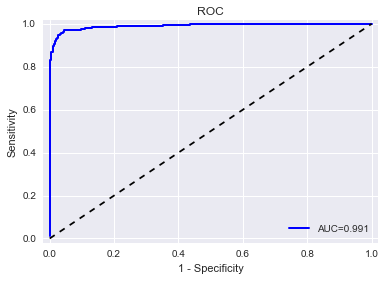

In [15]:
plt.title('ROC')
plt.plot(fpr, recall, 'b-', label='AUC={:.3F}'.format(roc_auc), linewidth=2)
plt.plot([0,1], [0,1], 'k--')
plt.legend(loc='lower right')
plt.xlim(-0.02,1.02)
plt.ylim(-0.02,1.02)
plt.xlabel('1 - Specificity') # Specificity == 1 - Fall-out => true negative rate
plt.ylabel('Sensitivity');    # Sensitivity == Recall       => true positive rate  

## glass identification dataset

In [16]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
col_names = ['id','ri','na','mg','al','si','k','ca','ba','fe','glass_type']
glass = pd.read_csv(url, names=col_names, index_col='id')
glass['assorted'] = glass.glass_type.map({1:0, 2:0, 3:0, 4:0, 5:1, 6:1, 7:1})
# sort DataFrame by al, for logistic regression results plot only
glass.sort_values(by = 'al', inplace=True)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,assorted
id,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,0
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,0


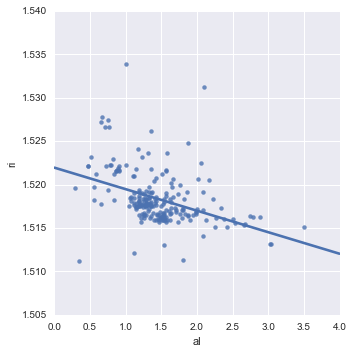

In [17]:
sns.lmplot(x='al', y='ri', data=glass, ci=None);

### build model

In [18]:
feature_cols = ['al']
X = glass[feature_cols]
y = glass.assorted

In [19]:
logreg = LogisticRegression(C=1e9)
logreg.fit(X, y);

In [20]:
assorted_pred_class = logreg.predict(X)

In [21]:
assorted_pred_prob = logreg.predict_proba(X)

In [22]:
# np.where returns the first value if the condition is True, 
# and the second value if the condition is False
assorted_pred_class2 = np.where(assorted_pred_prob[:,0]>0.5, 0, 1)
# first column is the prob of class 0
# second column is the prob of class 1

In [23]:
# check whether two methods get the same results
sum(assorted_pred_class != assorted_pred_class2)

0

### Interpreting Coefficients

In [24]:
# add predicted class to DataFrame
glass['assorted_pred_class'] = assorted_pred_class
# predicted probabilities of class 0
glass['assorted_pred_prob0'] = assorted_pred_prob[:,0]
# predicted probabilities of class 1
glass['assorted_pred_prob1'] = assorted_pred_prob[:,1]

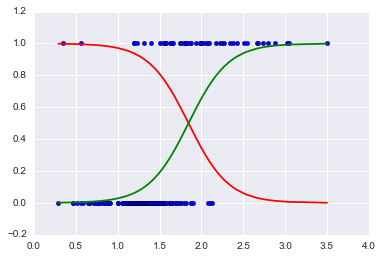

In [25]:
# plot the predicted probabilities
plt.scatter(glass.al, glass.assorted)
plt.plot(glass.al, glass.assorted_pred_prob0, color='red');
plt.plot(glass.al, glass.assorted_pred_prob1, color='green');

In [26]:
logreg.intercept_
# For an 'al' value of 0, the log-odds of 'assorted' is -7.71.

array([-7.71358449])

In [27]:
logreg.coef_
# A 1 unit increase in 'al' is associated with a 4.18 unit increase in the log-odds of 'assorted'.

array([[ 4.18040386]])

## Logistic Regression with Categorical Features

In [28]:
# create a categorical feature
glass['high_ba'] = np.where(glass.ba > 0.5, 1, 0)

In [29]:
# fit a logistic regression model
feature_cols2 = ['high_ba']
X2 = glass[feature_cols2]
y2 = glass.assorted
logreg2 = LogisticRegression(C=1e9)
logreg2.fit(X2, y2);

In [30]:
# examine the coefficient for high_ba
zip(feature_cols2, logreg2.coef_[0])
# Having a high 'ba' value (ba > 0.5) is associated with a 4.43 unit increase 
# in the log-odds of 'assorted' (as compared to a low 'ba' value ba < 0.5).

[('high_ba', 4.4273153450187213)]

## admission into graduate school

The same dataset as [UCLA's Logit Regression in R tutorial](http://www.ats.ucla.edu/stat/r/dae/logit.htm). The goal is to identify the various factors that may influence admission into graduate school.  

The dataset contains several columns which we can use as predictor variables:   

- gpa
- gre score
- rank or prestige of an applicant's undergraduate alma mater

The column, admit, is our binary target variable. It indicates whether or not a candidate was admitted our not.   

In [31]:
df = pd.read_csv("binary.csv")
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [32]:
# rename the 'rank' column because there is also a DataFrame method called 'rank'
df.columns = ["admit", "gre", "gpa", "prestige"]

In [33]:
# summarize the data
df.describe()

,admit,gre,gpa,prestige
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [34]:
# frequency table cutting presitge and whether or not someone was admitted
pd.crosstab(df['admit'], df['prestige'], rownames=['admit'])

prestige,1,2,3,4
admit,,,,
0,28,97,93,55
1,33,54,28,12


In [35]:
df.admit.value_counts() / df.admit.count()

0    0.6825
1    0.3175
Name: admit, dtype: float64

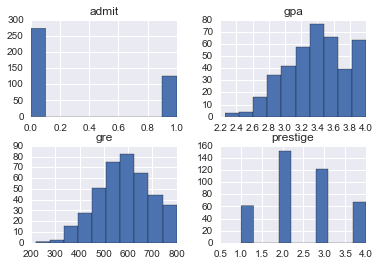

In [36]:
df.hist();

### dummy variables

pandas gives you a great deal of control over how categorical variables are represented. We're going dummify the "prestige" column using **get_dummies**.   

**get_dummies creates a new DataFrame with binary indicator variables for each category/option in the column specified**. In this case, prestige has four levels: 1, 2, 3 and 4 (1 being most prestigious). When we call get_dummies, we get a dataframe with four columns, each of which describes one of those levels.       

In [37]:
# dummify rank
dummy_ranks = pd.get_dummies(df['prestige'], prefix='prestige')
dummy_ranks.head()

,prestige_1,prestige_2,prestige_3,prestige_4
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0


In [38]:
# create a clean data frame for the regression
cols_to_keep = ['admit', 'gre', 'gpa']
cols_to_keep2 = ['prestige_2', 'prestige_3', 'prestige_4']
data = df[cols_to_keep].join(dummy_ranks[cols_to_keep2])

In [39]:
# manually add the intercept
data['intercept'] = 1.0
data.head()

,admit,gre,gpa,prestige_2,prestige_3,prestige_4,intercept
0,0,380,3.61,0.0,1.0,0.0,1.0
1,1,660,3.67,0.0,1.0,0.0,1.0
2,1,800,4.00,0.0,0.0,0.0,1.0
3,1,640,3.19,0.0,0.0,1.0,1.0
4,0,520,2.93,0.0,0.0,1.0,1.0


Once that's done, we merge the new dummy columns into the original dataset and get rid of the prestige column which we no longer need.
Lastly we're going to add a constant term for our Logistic Regression. **The statsmodels function we're going to be using requires that intercepts/constants are specified explicitly.**

### Performing the regression

Logistic Regression is quite simple. Specify the column containing the variable you're trying to predict followed by the columns that the model should use to make the prediction.

In our case we'll be predicting the admit column using gre, gpa, and the prestige dummy variables prestige_2, prestige_3 and prestige_4. **We're going to treat prestige_1 as our baseline and exclude it from our fit. This is done to prevent multicollinearity, or the dummy variable trap caused by including a dummy variable for every single category.**

In [40]:
train_cols = data.columns[1:]
logit = sm.Logit(data['admit'], data[train_cols])
# fit the model
logit_model = logit.fit()

Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6


In [41]:
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Mon, 01 Aug 2016   Pseudo R-squ.:                 0.08292
Time:                        17:00:45   Log-Likelihood:                -229.26
converged:                       True   LL-Null:                       -249.99
                                        LLR p-value:                 7.578e-08
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
gre            0.0023      0.001      2.070      0.038         0.000     0.004
gpa            0.8040      0.332      2.423      0.015         0.154     1.454
prestige_2    -0.6754      0.316     -2.134      0.033        -1.296    -0.055
prestige_3    -1.3402      0.345     -3.881      0.000        -2.017    -0.663
prestige_4    -1.5515      0.418     -3.713      0.000        -2.370    -0.733
intercept     -3.9900      1.140     -3.500      0.000        -6.224    -1.756
==============================================================================
"""

In [42]:
logit_model.params

gre           0.002264
gpa           0.804038
prestige_2   -0.675443
prestige_3   -1.340204
prestige_4   -1.551464
intercept    -3.989979
dtype: float64

In [43]:
logit_model.conf_int()

,0,1
gre,0.000120,0.004409
gpa,0.153684,1.454391
prestige_2,-1.295751,-0.055135
prestige_3,-2.016992,-0.663416
prestige_4,-2.370399,-0.732529
intercept,-6.224242,-1.755716


In [44]:
logit_model.pvalues

gre           0.038465
gpa           0.015388
prestige_2    0.032829
prestige_3    0.000104
prestige_4    0.000205
intercept     0.000465
dtype: float64

In this example, we're very confident that **there is an inverse relationship between the probability of being admitted and the prestige of a candidate's undergraduate school.**

In other words, the probability of being accepted into a graduate program is higher for students who attended a top ranked undergraduate college (prestige_1==True) as opposed to a lower ranked school with, say, prestige_4==True (remember, a prestige of 1 is the most prestigious and a prestige of 4 is the least prestigious.

In [45]:
# odds ratio
np.exp(logit_model.params)

gre           1.002267
gpa           2.234545
prestige_2    0.508931
prestige_3    0.261792
prestige_4    0.211938
intercept     0.018500
dtype: float64

**Take the exponential of each of the coefficients to generate the odds ratios**. This tells you how a 1 unit increase or decrease in a variable affects the odds of being admitted. For example, we can expect the odds of being admitted to decrease by about 50% if the prestige of a school is 2.

In [46]:
# confidence interval of odds ratio
OR_conf = logit_model.conf_int()
OR_conf['OR'] = logit_model.params
OR_conf.columns = ['2.5%', '97.5%', 'OR']
np.exp(OR_conf)

,2.5%,97.5%,OR
gre,1.000120,1.004418,1.002267
gpa,1.166122,4.281877,2.234545
prestige_2,0.273692,0.946358,0.508931
prestige_3,0.133055,0.515089,0.261792
prestige_4,0.093443,0.480692,0.211938
intercept,0.001981,0.172783,0.018500


### Prediction

In [47]:
gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)
gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)
# enumerate all possibilities
test = np.array(np.meshgrid(gres, gpas, [1,2,3,4], [1.0])).T.reshape(-1,4)
test = pd.DataFrame(test)
test.columns = ['gre', 'gpa', 'prestige', 'intercept']
# recreate the dummy variables
dummy_ranks = pd.get_dummies(test['prestige'], prefix='prestige')
dummy_ranks.columns = ['prestige_1', 'prestige_2', 'prestige_3', 'prestige_4']
# keep only what we need for making predictions
cols_to_keep = ['gre', 'gpa', 'prestige', 'intercept']
test = test[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2':])

In [48]:
test['admit_pred'] = logit_model.predict(test[train_cols])
test[(test.prestige==1) & (test.gre>600) & (test.gpa > 3)].head()

,gre,gpa,prestige,intercept,prestige_2,prestige_3,prestige_4,admit_pred
64,606.666667,3.033333,1.0,1.0,0.0,0.0,0.0,0.455787
65,606.666667,3.226667,1.0,1.0,0.0,0.0,0.0,0.494534
66,606.666667,3.420000,1.0,1.0,0.0,0.0,0.0,0.533346
67,606.666667,3.613333,1.0,1.0,0.0,0.0,0.0,0.571758
68,606.666667,3.806667,1.0,1.0,0.0,0.0,0.0,0.609325


### Takeaways

Logistic Regression is an excellent algorithm for classification. Even though some of the sexier, black box classification algorithms like SVM and RandomForest can perform better in some cases, it's hard to deny the value in knowing exactly what your model is doing. Often times **you can get by using RandomForest to select the features of your model and then rebuild the model with Logistic Regression using the best features.**

# 3-class Classifier

In [49]:
iris = datasets.load_iris()
iris.data[0:3,:]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2]])

In [50]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [51]:
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

In [52]:
# train / test  data
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [53]:
# build model
logreg = LogisticRegression()
logreg.fit(X_train, y_train);

In [54]:
# predict
predictions = logreg.predict(X_test)

In [55]:
confusion_matrix(y_test, predictions)

array([[9, 0, 0],
       [1, 9, 1],
       [0, 9, 9]])